<a href="https://colab.research.google.com/github/ZahraEk/OpenCV-Course/blob/main/mog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Required libraries :


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow



---
**MOG :**

Many background subtractors are named after the statistical clustering techniques they rely on for their machine learning approach. So, we will begin by looking at a background subtractor based on the MOG (Mixture of Gaussians) clustering technique.

OpenCV has two implementations of a MOG background subtractor. Perhaps not
surprisingly, they are named `cv2.BackgroundSubtractorMOG`
and `cv2.BackgroundSubtractorMOG2`. The latter is a more recent and improved
implementation, which adds support for shadow detection, so we will use it.
As a starting point, let's take our basic background subtraction script from the [basic_motion_detection](https://github.com/ZahraEk/OpenCV-Course/blob/main/basic_motion_detection.ipynb). We will make the following modifications to it:
1. Replace our basic background subtraction model with a MOG background
subtractor.
2. As input, use a video file instead of a camera.
3. Remove the use of Gaussian blur.
4. Adjust the parameters used in the thresholding, morphology, and contour
analysis steps.

More details in :[📄OpenCV_Course.pdf](https://github.com/ZahraEk/OpenCV-Course/blob/main/OpenCV_Course.pdf) | pages 7-9


---




Frame 1 :



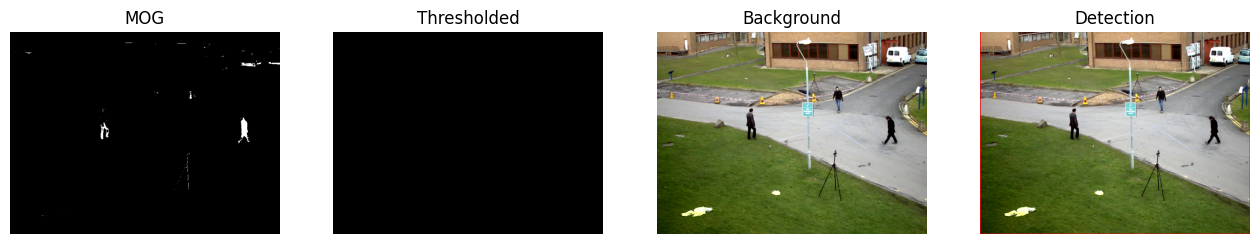


Frame 2 :



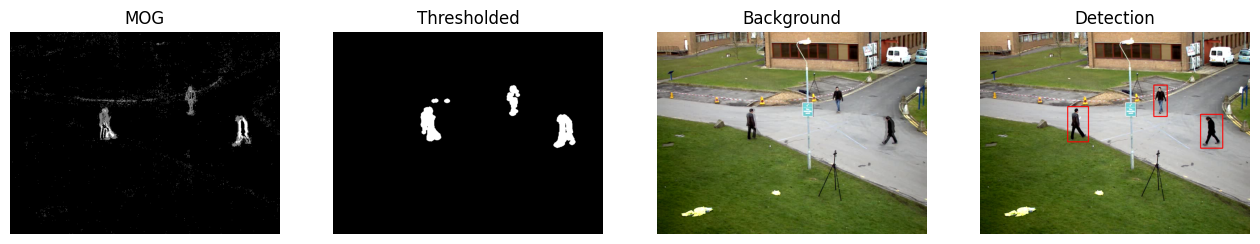


Frame 3 :



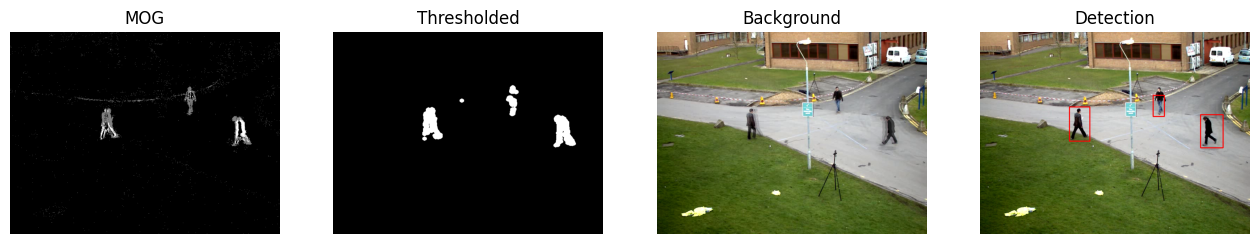


Frame 4 :



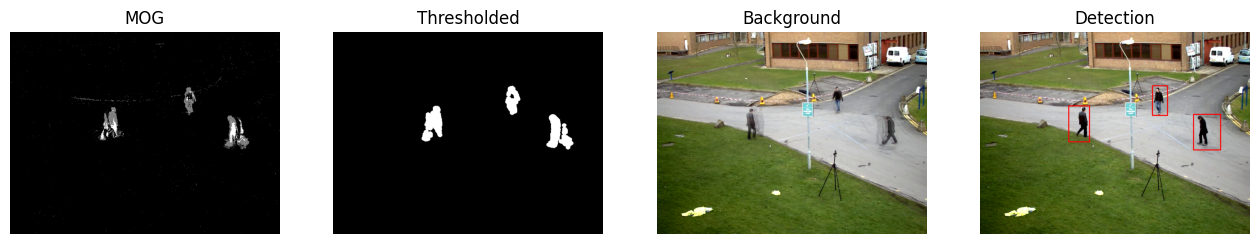


Frame 5 :



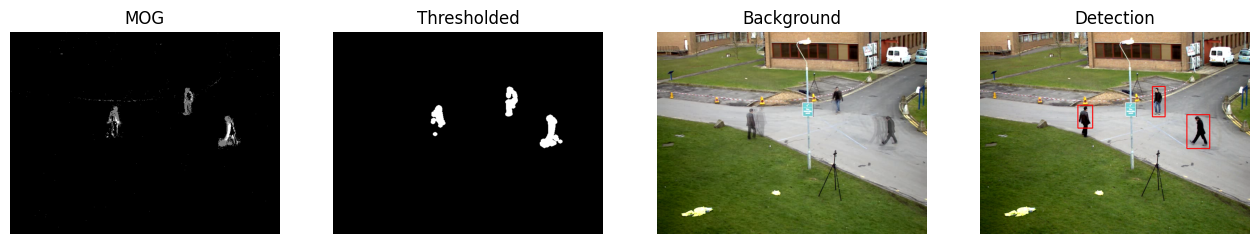

In [4]:
# Create a background subtractor using the MOG2 method with shadow detection enabled.
bg_subtractor = cv2.createBackgroundSubtractorMOG2(detectShadows=True)

# Define the kernel sizes for erosion and dilation
erode_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

# Open the video file for reading
cap = cv2.VideoCapture("drive/MyDrive/pedestrians.avi")

# Display the first 5 frames
for i in range(5):
    success, frame = cap.read()
    if not success:
      break

    # Apply background subtraction to get the foreground mask
    fg_mask = bg_subtractor.apply(frame)

    # Apply thresholding to create a binary image
    _, thresh = cv2.threshold(fg_mask, 100, 255, cv2.THRESH_BINARY)

    # Apply morphological erosion and dilation to smoothen the thresholded image
    cv2.erode(thresh, erode_kernel, thresh, iterations=2)
    cv2.dilate(thresh, dilate_kernel, thresh, iterations=2)

    # Find contours of objects in the thresholded image
    contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through detected contours and draw bounding rectangles for large ones
    for c in contours:
        if cv2.contourArea(c) > 1000:
            x, y, w, h = cv2.boundingRect(c)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)

    # Create a subplot for each image and display it
    print(f"\nFrame {i+1} :\n")
    f, subplt = plt.subplots(1,4, figsize=(16,12))

    subplt[0].imshow(fg_mask, cmap='gray')
    subplt[0].set_title('MOG')
    subplt[0].axis('off')

    subplt[1].imshow(thresh, cmap='gray')
    subplt[1].set_title('Thresholded')
    subplt[1].axis('off')

    subplt[2].imshow(cv2.cvtColor(bg_subtractor.getBackgroundImage(), cv2.COLOR_BGR2RGB))
    subplt[2].set_title('Background')
    subplt[2].axis('off')

    subplt[3].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    subplt[3].set_title('Detection')
    subplt[3].axis('off')

    plt.show()

# Release the video capture object and close OpenCV windows
cap.release()
cv2.destroyAllWindows()

> Result in video form : [mog_pedestrians.avi](https://drive.google.com/file/d/1F9vA0afltsGHMh2rRXdsDTuEZjMvKQsW/view?usp=sharing)